In [1]:
%matplotlib inline
import numpy as np
import math
from scipy import stats
from scipy import special
from matplotlib import pyplot as plt

# "A Little Statistics"
## 1. Sigma

For context, samples are drawn from a probability density function which influences the overall shape and spread of the sample values. It can be multimodal (multiple peaks overlayed); it can extend far past the mean (if there is one) or be centered completely (like Dirac Delta), and there can be constraints on possible values due to the physical phenomena they describe (photos cannot have negative counts, at least before being processed). 

The Gaussian, or normal, distribution is the most important; visually described as a bell curve, whose inputs are $\mu$ (where the distribution is centered, aka the mean) and $\sigma$ (where the interval $\mu - \sigma$ , $\mu + \sigma$ should include 68% of the data).

The probability density function is represented with:
$$ h(x) = p(x \mid \mu,\sigma) = N(x|\mu,\sigma) \equiv \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right) $$

Saying your background signal is $x \sigma$ from the mean does not necessarily imply that your overall signal is pulled from a Gaussian. It just means that when you take the semi-log of the histogram and integrate the portion of the curve corresponding to your background signal, it is common shorthand to relate the proportional amount of the curve to an associated Gaussian sigma.

The "Cumulative Distribution Function", or CDF, takes in a value and returns the probability of it and all values lesser than it occuring by integrating the PDF. So, at the mean, CDF returns 0.5 (50%), and all values above the mean are above 50%. You can plot 1-cdf to reverse the tails.

The values of the integrated PDF (cdf) at -1, 1, and 2 respectively are 0.15866, 0.84134, and 0.97725. 

These fit the values for a CDF's z-table. 



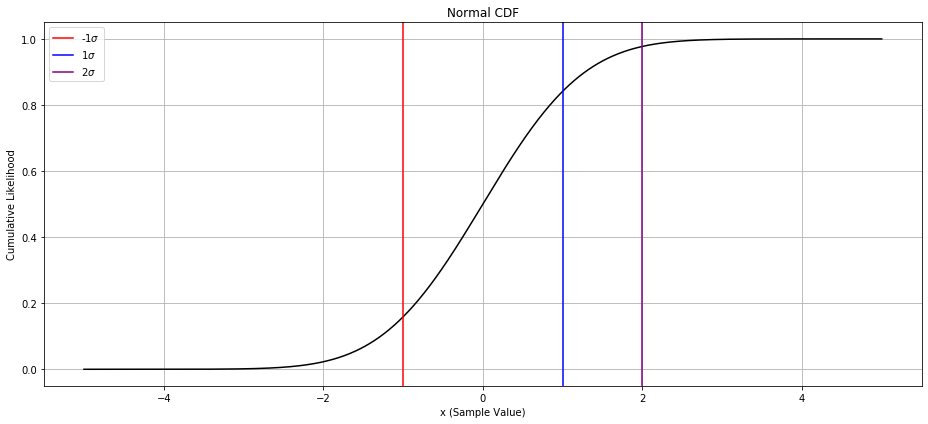

In [4]:
#integrating a normal distribution can be done with stats.norm.cdf()... default mu & sigma are 0 and 1; change w loc=mu, scale=sigma
mu,sigma = 0.,1.

fig, ax = plt.subplots(figsize=(13, 6))

sigma1,sigma2,sigma3 = -1,1,2
z1,z2,z3 = stats.norm.cdf(sigma1),stats.norm.cdf(sigma2),stats.norm.cdf(sigma3)
print("The values of the integrated PDF (cdf) at -1, 1, and 2 respectively are {0:.5f}, {1:.5f}, and {2:.5f}. \n\nThese fit the values for a CDF's z-table. \n".
      format(z1,z2,z3))

x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
plt.plot(x,stats.norm.cdf(x), c='black')
plt.axvline(-1, c='red', label='-1$\sigma$')
plt.axvline(1, c='blue', label='1$\sigma$')
plt.axvline(2, c="purple", label='2$\sigma$')

plt.title('Normal CDF')
plt.xlabel('x (Sample Value)')
plt.ylabel('Cumulative Likelihood')

plt.tight_layout()
plt.grid()
plt.legend()

plt.show()

### It is more often that we want to determine the number of sigma away our input is (the $x$ in $x \sigma$), with our input being the probability (the area under the curve). This function is referred to as the Percent Point Function, or PPF. If PPF spits out a negative number, this means the associate sigma lies below the mean.

The values of PPF at 0.15866, 0.84134, and 0.97725 respectively are -1.00000, 1.00000, and 2.00000. 

These fit the values for z-table. 



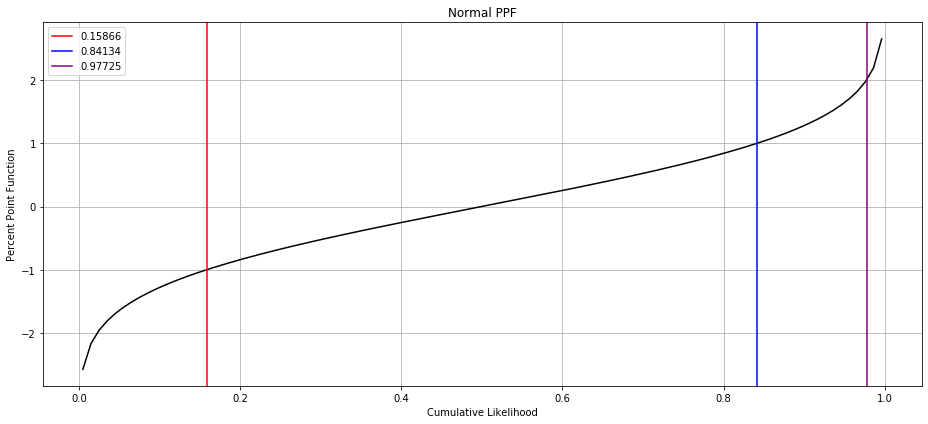

In [5]:
fig, ax = plt.subplots(figsize=(13, 6))

p1,p2,p3 = stats.norm.ppf(z1),stats.norm.ppf(z2),stats.norm.ppf(z3)
print("The values of PPF at 0.15866, 0.84134, and 0.97725 respectively are {0:.5f}, {1:.5f}, and {2:.5f}. \n\nThese fit the values for z-table. \n".
      format(p1,p2,p3))

x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
plt.plot(x,stats.norm.ppf(x), c='black')
plt.axvline(z1, c='red', label='0.15866')
plt.axvline(z2, c='blue', label='0.84134')
plt.axvline(z3, c="purple", label='0.97725')

plt.title('Normal PPF')
plt.xlabel('Cumulative Likelihood')
plt.ylabel('Percent Point Function')

plt.tight_layout()
plt.grid()
plt.legend()

plt.show()

## 2. Continuous Distribution: Rayleigh

This distribution is continuous and operates on non-negative random variables. It is equivalent to the Chi-Squared distribution, wherein the function is calculated using the sum of the squares of the random variables... the difference is that where chi-squared uses k indepdent variables, whereas Rayleigh uses specifically two independent variables (also described as degrees of freedom).

It is most used by applying it to find the magnitude of a superposition of vectors - like wind velocity analyzed in two directions.

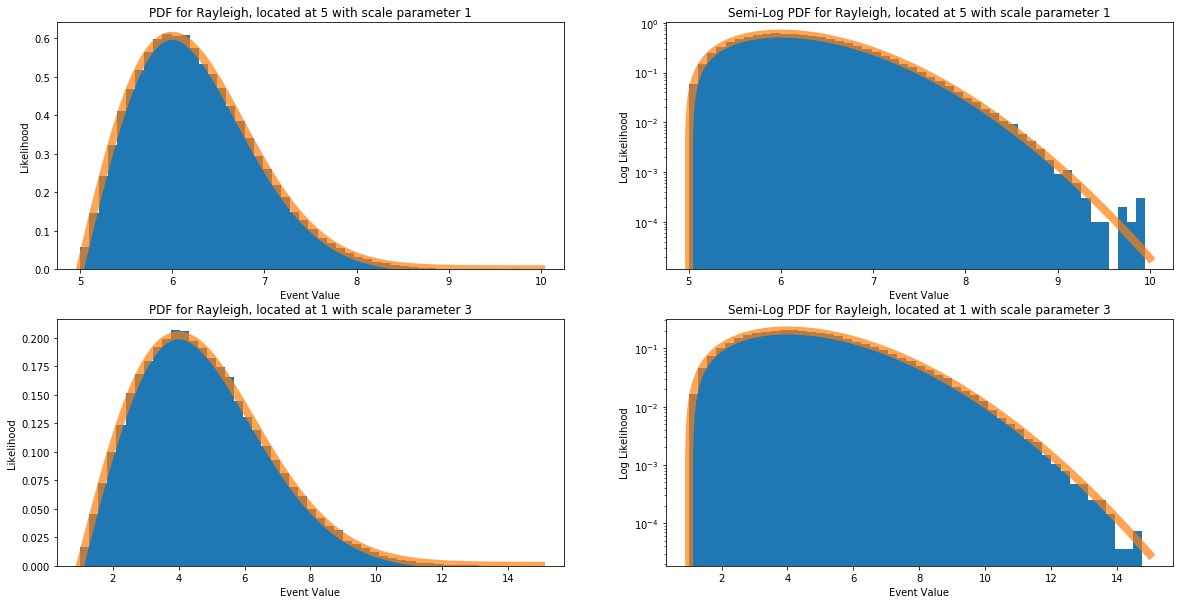

In [6]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,10) 


d1 = stats.rayleigh.rvs(loc = 5., scale = 1., size = 100000)
d2 = stats.rayleigh.rvs(loc = 1., scale = 3., size = 100000)
x1 = np.linspace(5.,10.,1000)
x2 = np.linspace(1.,15.,1000)


ax[0,0].hist(d1,50, density=True)
ax[0,0].plot(x1,stats.rayleigh.pdf(x1,loc = 5., scale = 1.),linewidth = 8,alpha = 0.7);
ax[0,0].set_title('PDF for Rayleigh, located at 5 with scale parameter 1')
ax[0,0].set_xlabel('Event Value')
ax[0,0].set_ylabel('Likelihood')

ax[0,1].hist(d1,50, density=True)
ax[0,1].plot(x1,stats.rayleigh.pdf(x1,loc = 5., scale = 1.),linewidth = 8,alpha = 0.7);
ax[0,1].set_yscale('log')
ax[0,1].set_title('Semi-Log PDF for Rayleigh, located at 5 with scale parameter 1')
ax[0,1].set_xlabel('Event Value')
ax[0,1].set_ylabel('Log Likelihood')

ax[1,0].hist(d2,50, density=True)
ax[1,0].plot(x2,stats.rayleigh.pdf(x2,loc = 1., scale = 3.),linewidth = 8,alpha = 0.7);
ax[1,0].set_title('PDF for Rayleigh, located at 1 with scale parameter 3')
ax[1,0].set_xlabel('Event Value')
ax[1,0].set_ylabel('Likelihood')

ax[1,1].hist(d2,50, density=True)
ax[1,1].plot(x2,stats.rayleigh.pdf(x2,loc = 1., scale = 3.),linewidth = 8,alpha = 0.7);
ax[1,1].set_yscale('log')
ax[1,1].set_title('Semi-Log PDF for Rayleigh, located at 1 with scale parameter 3')
ax[1,1].set_xlabel('Event Value')
ax[1,1].set_ylabel('Log Likelihood')

plt.show()

### For my hypothetical measurement, I will use the first distribution located at 5 with scale parameter $\sigma = 1$, and choose the value 7.

### My statistical question is: for what value of $X$ in $X \sigma$ would the value 7 and its associated probability be equated to?

### CDF of Rayleigh: $1-e^{-7^{2}/(2\sigma^{2})}$ must be equal to $ \int p(7 \mid \mu,\sigma) = \int \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(7-\mu)^2}{2\sigma^2}\right) $

In [12]:
#signal of 7

meas_cdf = stats.rayleigh.cdf(7.,loc = 5., scale = 1.)
meas_x = stats.norm.ppf(meas_cdf)

print("The probability of a signal of 7 or larger occuring is {0:.5f}. The associated sigma is {1:.5f}.".format(1-meas_cdf,meas_x))

The probability of a signal of 7 or larger occuring is 0.13534. The associated sigma is 1.10152.


In [14]:
#signal of 9

meas_cdf = stats.rayleigh.cdf(9.,loc = 5., scale = 1.)
meas_x = stats.norm.ppf(meas_cdf)

print("The probability of a signal of 9 or larger occuring is {0:.5f}. The associated sigma is {1:.5f}.".format(1-meas_cdf,meas_x))

The probability of a signal of 9 or larger occuring is 0.00034. The associated sigma is 3.40119.


In [22]:
#signal of 6

meas_cdf = stats.rayleigh.cdf(6.,loc = 5., scale = 1.)
meas_x = stats.norm.ppf(meas_cdf)

print("The probability of a signal of 6 or larger occuring is {0:.5f}. The associated sigma is {1:.5f}.".format(1-meas_cdf,meas_x))

The probability of a signal of 6 or larger occuring is 0.60653. The associated sigma is -0.27029.


## Even though the Rayleigh distribution is "located" at 5, a signal of 6 is $-0.27029 \sigma$ away from the "mean". This further emphasizes that the Rayleigh's shape is by and large determined by its scale parameter.

# "Non-Continuous Distributions"
### 1. The Binomial Distribution describes a system where there are only two outcomes, often described as a "success" or "failure". This means there will be a discrete number of successes & failures.

### Mathetmatically, this looks like $\frac{N!}{n!(N-n)!}p^{n}(1-p)^{N-n}$, where $N$ is the sample size, and $p$ is the probability of $n$ being the outcome. The expected value, or mean, is $Np$.

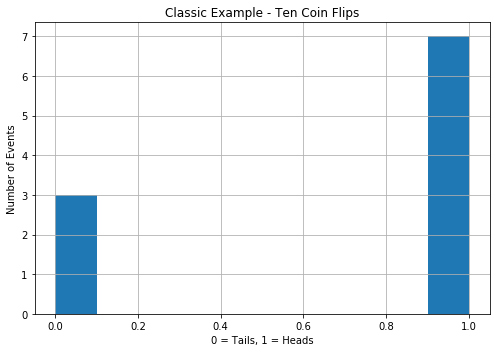

In [90]:
fig, ax = plt.subplots(figsize=(7, 5))

binom1 = stats.binom.rvs(n=1,p=.5,size=10)

plt.hist(binom1,density=True)

plt.title('Classic Example - Ten Coin Flips')
plt.xlabel('0 = Tails, 1 = Heads')
plt.ylabel('Number of Events')

plt.tight_layout()
plt.grid()
plt.show()

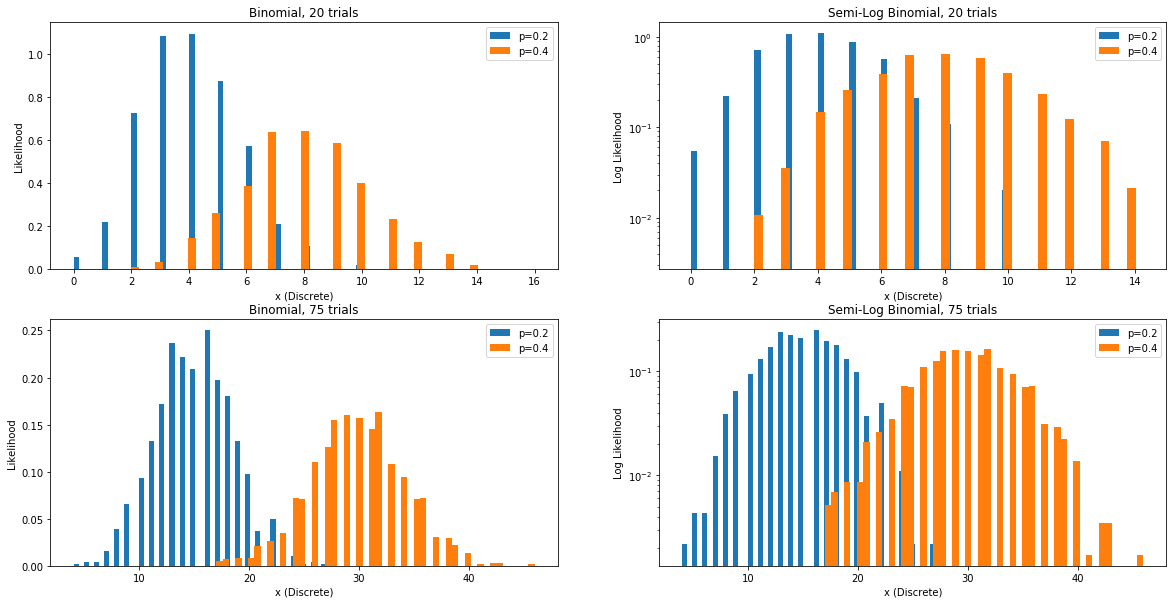

In [92]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,10) 


b1 = stats.binom.rvs(n=20,p=.2,size=1000)
b2 = stats.binom.rvs(n=20,p=.4,size=1000)
b3 = stats.binom.rvs(n=75,p=.2,size=1000)
b4 = stats.binom.rvs(n=75,p=.4,size=1000)


ax[0,0].hist(b1,50,density=True,label="p=0.2")
ax[0,0].hist(b2,50,density=True,label="p=0.4")
ax[0,0].set_title('Binomial, 20 trials')
ax[0,0].set_xlabel('x (Discrete)')
ax[0,0].set_ylabel('Likelihood')
ax[0,0].legend()

ax[0,1].hist(b1,50,density=True,label='p=0.2')
ax[0,1].hist(b2,50,density=True,label='p=0.4')
ax[0,1].set_xlim(-1,15)
ax[0,1].set_yscale('log')
ax[0,1].set_title('Semi-Log Binomial, 20 trials')
ax[0,1].set_xlabel('x (Discrete)')
ax[0,1].set_ylabel('Log Likelihood')
ax[0,1].legend()

ax[1,0].hist(b3,50,density=True,label='p=0.2')
ax[1,0].hist(b4,50,density=True,label='p=0.4')
ax[1,0].set_title('Binomial, 75 trials')
ax[1,0].set_xlabel('x (Discrete)')
ax[1,0].set_ylabel('Likelihood')
ax[1,0].legend()

ax[1,1].hist(b3,50,density=True,label='p=0.2')
ax[1,1].hist(b4,50,density=True,label='p=0.4')
ax[1,1].set_yscale('log')
ax[1,1].set_title('Semi-Log Binomial, 75 trials')
ax[1,1].set_xlabel('x (Discrete)')
ax[1,1].set_ylabel('Log Likelihood')
ax[1,1].legend()

plt.show()

#### Increasing p obviously shifts the curve to the right. Increasing n trials allow for more distinction between distributions of differing values for p.

### Using the second example with 75 trials and p=0.2, I would like to find the associated sigma for the discrete value of 20.

In [95]:
prob = 1-stats.binom.cdf(k=20,n=75,p=0.2)
x_binom = stats.norm.ppf(stats.binom.cdf(k=20,n=75,p=0.2))

print("The probability of getting the value 20 is {0:.5f}, and corresponds to a sigma of {1:.5f}.".format(prob,x_binom))

The probability of getting the value 20 is 0.06034, and corresponds to a sigma of 1.55196.


### Since this distribution is discrete, this implies that any non-integer signal can be considered noise. In an experiment, we might use ceiling and floor functions in order to approximate results.

### Additionally, the discrete nature of the distribution yields continuous results for any mean that might be calculated. As stated previously, the expected value is $Np$, but the measured mean is still the sum of the results divided by $N$, which in no way can be guaranteed to be an integer.